In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import scipy.stats as stats

In [346]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [347]:
cars= pd.read_csv("C:\Alabs\Datasets\Car_sales - 1656244153716.csv", sep= "," )

In [348]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [349]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [350]:
cars.nunique()

Manufacturer               30
Model                     156
Sales_in_thousands        157
four_year_resale_value    117
Vehicle_type                2
Price_in_thousands        152
Engine_size                31
Horsepower                 66
Wheelbase                  88
Width                      78
Length                    127
Curb_weight               147
Fuel_capacity              55
Fuel_efficiency            20
Latest_Launch             130
Power_perf_factor         154
dtype: int64

In [351]:
#Separating categorical and continuous variables
cars_cont = cars.select_dtypes('float64')
cars_cat = cars.select_dtypes('object')

In [352]:
cars_cat = cars_cat.drop(axis= 1, labels= 'Latest_Launch')

In [353]:
def fn_desc( x ):
    # missing values calculation
    ntot = x.shape[0]
    n = x.count()
    n_miss = ntot - n
    n_miss_perc = n_miss/ntot
    
    # get the lc and uc using IQR
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 - q1
    lc_iqr = q1 - 1.5 * IQR
    uc_iqr = q3 + 1.5 * IQR
    
    # return the descriptives
    
    return pd.Series([x.dtype, x.nunique(),
                       ntot, n, n_miss, n_miss_perc,
                      IQR, lc_iqr, uc_iqr,
                      x.sum(), x.mean(), x.var(), x.std(),
                      x.min(), 
                      x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                      x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                      x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), 
                      x.max() ],
                     index = ['dtype', 'cardinality',
                               'ntot', 'n', 'n_miss', 'n_miss_perc',
                              'IQR', 'lc_iqr', 'uc_iqr',
                              'sum', 'mean', 'var', 'std',
                              'min', 
                              'p1', 'p5', 'p10', 
                              'p25', 'p50', 'p75', 
                              'p90', 'p95', 'p99',
                              'max' ])

In [354]:
cars_cont.apply(fn_desc)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,157,117,152,31,66,88,78,127,147,55,20,154
ntot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,121,155,156,156,156,156,156,155,156,154,155
n_miss,0,36,2,1,1,1,1,1,2,1,3,2
n_miss_perc,0.0,0.229299,0.012739,0.006369,0.006369,0.006369,0.006369,0.006369,0.012739,0.006369,0.019108,0.012739
IQR,53.842,8.615,13.93,1.275,65.5,9.2,5.025,18.55,0.8285,3.775,5.0,29.007171
lc_iqr,-66.649,-1.6625,-2.8775,0.3875,51.25,89.2,60.8625,149.75,1.72825,10.1375,13.5,16.896951
uc_iqr,148.719,32.7975,52.8425,5.4875,313.25,126.0,80.9625,223.95,5.04225,25.2375,33.5,132.925634
sum,8320.698,2186.83,4245.567,477.5,29008.0,16768.0,11099.4,29225.6,523.594,2800.5,3672.0,11941.756636


In [355]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [356]:
cars_cat.apply(categorical_var_summary)

,Manufacturer,Model,Vehicle_type
N,157,157,157
NMISS,0,0,0
MODE,Dodge,Neon,Passenger
FREQ,11,2,116
PERCENT,7.01,1.27,73.89


In [357]:
#Outlier treatment
cars_cont.apply( lambda x: x.clip (lower= x.quantile(0.01),upper= x.quantile(0.99)) )

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [358]:
cars_cont = cars_cont.apply( lambda x: x.clip (lower= x.quantile(0.01),upper= x.quantile(0.99)) )

In [359]:
from sklearn.impute import KNNImputer

In [360]:
# missing value treatment
imputer = KNNImputer(n_neighbors= 5, weights= 'distance')
aft_impute = imputer.fit_transform(cars_cont)

In [361]:
pd.DataFrame(aft_impute)

,0,1,2,3,4,5,6,7,8,9,10,11
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225000,35.208539,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,93.284449
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,16.491221,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,13.760011,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,13.873111,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,28.954773,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [362]:
pd.DataFrame(aft_impute).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       157 non-null    float64
 1   1       157 non-null    float64
 2   2       157 non-null    float64
 3   3       157 non-null    float64
 4   4       157 non-null    float64
 5   5       157 non-null    float64
 6   6       157 non-null    float64
 7   7       157 non-null    float64
 8   8       157 non-null    float64
 9   9       157 non-null    float64
 10  10      157 non-null    float64
 11  11      157 non-null    float64
dtypes: float64(12)
memory usage: 14.8 KB


In [363]:
pd.DataFrame(aft_impute, columns=cars_cont.columns )

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225000,35.208539,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,93.284449
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,16.491221,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,13.760011,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,13.873111,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,28.954773,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [364]:
cars_cont = pd.DataFrame(aft_impute, columns=cars_cont.columns )

In [365]:
cars_cont.apply(fn_desc)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,155,151,152,30,65,88,77,126,147,55,22,154
ntot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,157,157,157,157,157,157,157,157,157,157,157
n_miss,0,0,0,0,0,0,0,0,0,0,0,0
n_miss_perc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IQR,53.842,8.24038,13.82,1.2,65.0,9.2,5.0,18.5,0.846,3.7,5.0,28.700373
lc_iqr,-66.649,-0.07595,-2.585,0.5,52.5,89.2,60.9,149.85,1.706,10.25,13.5,17.676887
uc_iqr,148.719,32.88557,52.695,5.3,312.5,126.0,80.9,223.85,5.09,25.05,33.5,132.47838
sum,8025.5292,2925.070013,4296.803718,478.879524,29086.479829,16866.001872,11173.385972,29407.947899,531.51966,2817.889429,3727.158901,12077.974307


In [366]:
# One hot encoding of categorical var
pd.get_dummies(data= cars_cat, drop_first= True, dtype= int)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Model_Town car,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
154,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [367]:
cars_cat = pd.get_dummies(data= cars_cat, drop_first= True, dtype= int)

In [368]:
# combining Categorical and Continuous vars DF
cars= pd.concat([cars_cat, cars_cont], axis = 1, verify_integrity= True )

In [369]:
cars.head()

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,0,0,0,0,0,0,0,0,0,0,...,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,0,0,0,0,0,0,0,0,0,0,...,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,0,0,0,0,0,0,0,0,0,0,...,35.208539,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,93.284449
3,0,0,0,0,0,0,0,0,0,0,...,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1,0,0,0,0,0,0,0,0,0,...,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [370]:
cars.shape

(157, 197)

### Distribution of variables

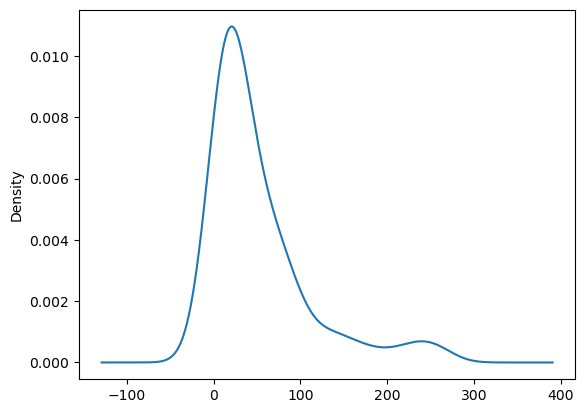

In [371]:
cars.Sales_in_thousands.plot(kind='kde')
plt.show()

In [372]:
cars.Sales_in_thousands.skew()

1.9924932920508793

### this distribution is highly skewed

In [373]:
cars.loc[:, 'log_Sales_in_thousands'] = np.log(cars.Sales_in_thousands)

<Axes: ylabel='Density'>

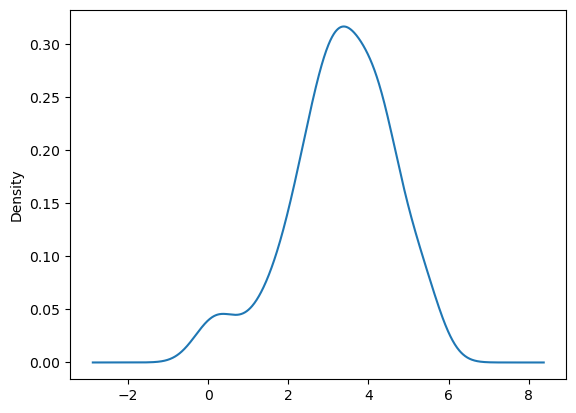

In [374]:
cars.loc[:, 'log_Sales_in_thousands'].plot(kind='kde')

In [328]:
cars.loc[:, 'log_Sales_in_thousands'].skew()

-0.5925861100519006

In [375]:
cars.rename( columns = {'Manufacturer_Mercedes-B': 'Manufacturer_Mercedes_B' , 'Model_Carrera Cabrio': 'Model_Carrera_Cabrio', 'Model_Carrera Coupe': 'Model_Carrera_Coupe' }, inplace = True)

In [376]:
cars.corr()

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,log_Sales_in_thousands
Manufacturer_Audi,1.000000,-0.019481,-0.022568,-0.025314,-0.034418,-0.030151,-0.038311,-0.038311,-0.025314,-0.019481,...,-0.016711,0.092374,0.012736,0.066233,0.022353,0.022901,0.058286,-0.014362,0.100722,-0.134931
Manufacturer_BMW,-0.019481,1.000000,-0.022568,-0.025314,-0.034418,-0.030151,-0.038311,-0.038311,-0.025314,-0.019481,...,-0.050078,0.000184,0.023456,-0.078778,-0.078266,-0.023191,-0.026293,0.044519,0.012347,-0.068309
Manufacturer_Buick,-0.022568,-0.022568,1.000000,-0.029326,-0.039873,-0.034929,-0.044382,-0.044382,-0.029326,-0.022568,...,0.095227,0.064652,0.078310,0.107127,0.149898,0.048220,-0.008450,0.020879,0.049869,0.087507
Manufacturer_Cadillac,-0.025314,-0.025314,-0.029326,1.000000,-0.044725,-0.039180,-0.049783,-0.049783,-0.032895,-0.025314,...,0.269416,0.244442,0.114390,0.177235,0.189840,0.242842,0.136269,-0.144147,0.232455,-0.075474
Manufacturer_Chevrolet,-0.034418,-0.034418,-0.039873,-0.044725,1.000000,-0.053271,-0.067688,-0.067688,-0.044725,-0.034418,...,0.016937,-0.054935,-0.116765,-0.036825,-0.028559,-0.147458,-0.148967,0.210432,-0.064673,0.098202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Curb_weight,0.022901,-0.023191,0.048220,0.242842,-0.147458,-0.011861,0.105855,0.032738,-0.017141,-0.166402,...,0.801704,0.646582,0.657982,0.715221,0.626540,1.000000,0.865082,-0.829836,0.638114,-0.053147
Fuel_capacity,0.058286,-0.026293,-0.008450,0.136269,-0.148967,-0.071137,0.248308,0.080658,-0.041494,-0.125582,...,0.698341,0.526491,0.659601,0.648542,0.561751,0.865082,1.000000,-0.819732,0.520173,-0.019512
Fuel_efficiency,-0.014362,0.044519,0.020879,-0.144147,0.210432,0.013906,-0.232159,-0.064037,0.057851,0.138730,...,-0.756379,-0.610182,-0.498231,-0.585644,-0.419240,-0.829836,-0.819732,1.000000,-0.601688,0.131331
Power_perf_factor,0.100722,0.012347,0.049869,0.232455,-0.064673,0.008544,-0.003707,-0.090318,-0.089851,-0.155339,...,0.796249,0.992739,0.288149,0.505149,0.372128,0.638114,0.520173,-0.601688,1.000000,-0.449298


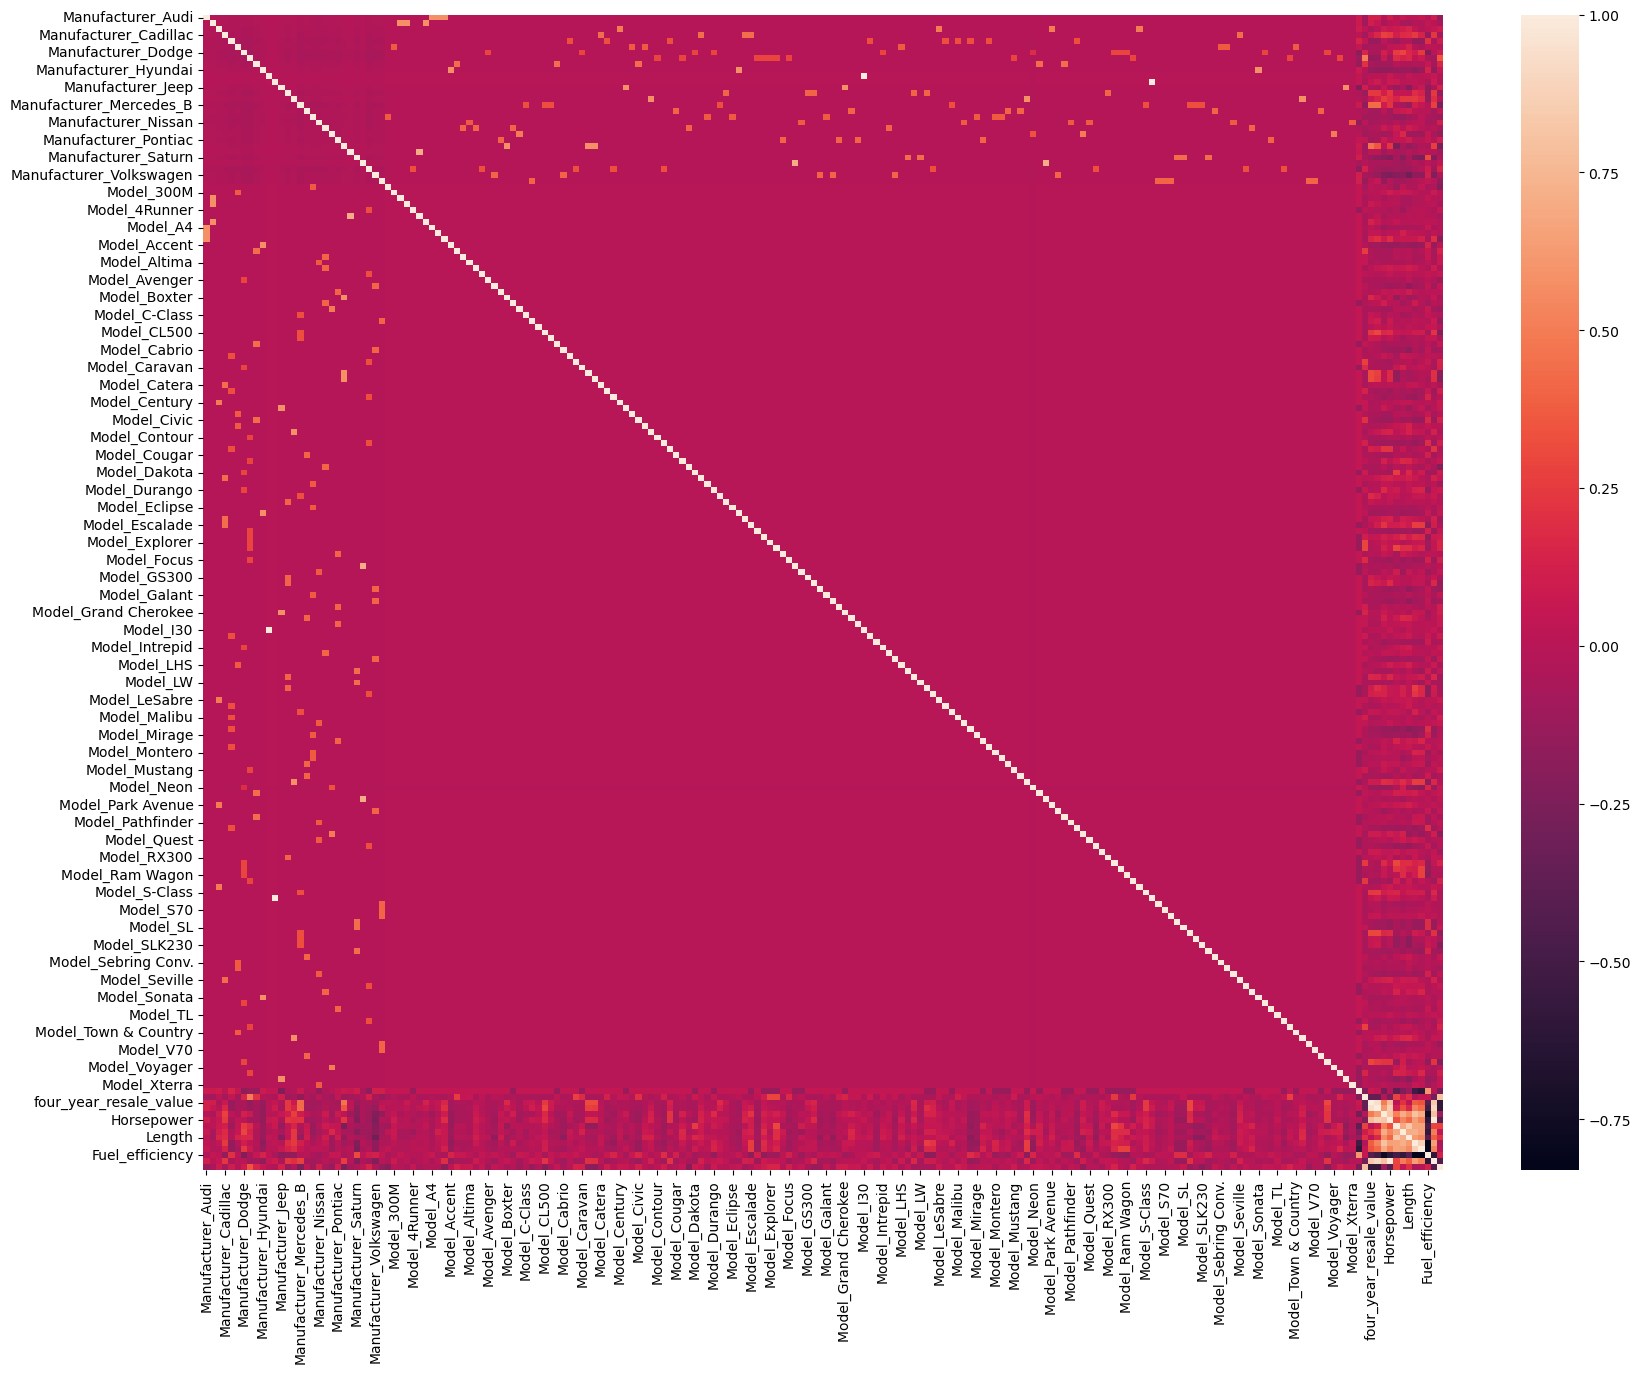

In [377]:
plt.figure(figsize=(20,15))
sns.heatmap(cars.corr())
plt.show()

### significance: F_Regression

In [378]:
# feature selection based on importance
from sklearn.feature_selection import f_regression

In [379]:
x_vars = cars.columns.difference(['Sales_in_thousands', 'log_Sales_in_thousands'])

In [380]:
f_regression(X = cars.loc[:, x_vars], y = cars.log_Sales_in_thousands)

(array([4.39052048e-01, 2.29979504e+00, 5.90345389e-02, 2.72034890e+00,
        2.97150443e+01, 6.89075593e+00, 2.87431325e+00, 7.26643425e-01,
        1.19607342e+00, 8.87998925e-01, 1.50931560e+00, 4.13080058e-02,
        1.20726402e+00, 2.10614471e+01, 3.85234853e+00, 4.09934318e-01,
        1.20970235e-02, 2.01879468e-01, 2.72420394e+00, 2.64821433e+00,
        1.51744419e-02, 9.87857270e+00, 1.22424884e-01, 1.76400323e+00,
        2.09727185e+00, 8.59196240e-01, 2.97104624e+00, 1.55566912e+00,
        1.06531777e+01, 1.14794614e+00, 1.96140578e-01, 1.73893824e-01,
        3.41793527e+00, 1.85193302e-01, 3.93450113e+00, 7.49211848e+00,
        8.98829565e-03, 6.51510578e-02, 7.40593898e-01, 5.35684416e-01,
        7.46578893e-01, 1.22466984e-01, 5.26871757e-02, 8.70914921e-02,
        5.80969701e+00, 1.07659226e-01, 2.93007828e+00, 7.38518818e-01,
        8.72149782e-01, 2.40385380e-01, 4.58174736e-01, 1.95183112e+00,
        2.24369006e-01, 4.84369616e-02, 7.78687918e-01, 5.976351

In [381]:
f_val, p_val = f_regression(X = cars.loc[:, x_vars], y = cars.log_Sales_in_thousands)

In [382]:
f_reg = pd.DataFrame(data = [x_vars, f_val, p_val] ).T
f_reg.columns = ['Features', 'F_Value', 'P_Value']

In [383]:
f_reg

,Features,F_Value,P_Value
0,Curb_weight,0.439052,0.508564
1,Engine_size,2.299795,0.131428
2,Fuel_capacity,0.059035,0.80835
3,Fuel_efficiency,2.720349,0.101102
4,Horsepower,29.715044,0.0
...,...,...,...
191,Price_in_thousands,78.515144,0.0
192,Vehicle_type_Passenger,12.462157,0.000547
193,Wheelbase,12.13499,0.000643
194,Width,0.224989,0.635932


In [384]:
f_reg.loc[f_reg.P_Value < 0.05]

,Features,F_Value,P_Value
4,Horsepower,29.715044,0.0
5,Length,6.890756,0.009532
13,Manufacturer_Ford,21.061447,0.000009
21,Manufacturer_Mercedes_B,9.878573,0.002004
28,Manufacturer_Porsche,10.653178,0.001352
34,Manufacturer_Volvo,3.934501,0.049071
35,Model_3000GT,7.492118,0.006922
44,Model_A8,5.809697,0.017109
60,Model_CL500,7.409943,0.007229
67,Model_Carrera_Cabrio,4.660187,0.032409


In [385]:
f_reg.loc[f_reg.P_Value < 0.05, 'Features']

4                   Horsepower
5                       Length
13           Manufacturer_Ford
21     Manufacturer_Mercedes_B
28        Manufacturer_Porsche
34          Manufacturer_Volvo
35                Model_3000GT
44                    Model_A8
60                 Model_CL500
67        Model_Carrera_Cabrio
68         Model_Carrera_Coupe
83               Model_Cutlass
146              Model_Prowler
165               Model_SLK230
185                Model_Viper
190          Power_perf_factor
191         Price_in_thousands
192     Vehicle_type_Passenger
193                  Wheelbase
195     four_year_resale_value
Name: Features, dtype: object

In [386]:
features = list(f_reg.loc[f_reg.P_Value < 0.05, 'Features'])

In [387]:
formula_1 = 'log_Sales_in_thousands ~ '+ '+'.join(features)
formula_1

'log_Sales_in_thousands ~ Horsepower+Length+Manufacturer_Ford+Manufacturer_Mercedes_B+Manufacturer_Porsche+Manufacturer_Volvo+Model_3000GT+Model_A8+Model_CL500+Model_Carrera_Cabrio+Model_Carrera_Coupe+Model_Cutlass+Model_Prowler+Model_SLK230+Model_Viper+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value'

## Multicollinearity : VIF

In [388]:
# import VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# since VIF takes input in the form of dmatrix, we will have to import dmatrices from patsy
from patsy import dmatrices

In [389]:
cars.rename( columns = {'Model_Carrera Cabrio': 'Model_Carrera_Cabrio', 'Model_Carrera Coupe': 'Model_Carrera_Coupe' }, inplace = True)

In [391]:
# separating x and y variables
y, x = dmatrices(formula_1, cars, return_type = 'dataframe')

In [393]:
vif = pd.DataFrame()

In [395]:
vif['features'] =  x.columns
vif

,features
0,Intercept
1,Horsepower
2,Length
3,Manufacturer_Ford
4,Manufacturer_Mercedes_B
5,Manufacturer_Porsche
6,Manufacturer_Volvo
7,Model_3000GT
8,Model_A8
9,Model_CL500


In [406]:
[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

[368.73947620885946,
 1270.5636142115293,
 7.470841269310645,
 1.0976906286494086,
 2.055134756556732,
 3.6370117399753212,
 1.0968611795148644,
 1.0545714878870593,
 1.1264127969659083,
 1.3808714346688258,
 2.108132631499318,
 2.0764055842210505,
 1.0161040632895044,
 1.3878113591994305,
 1.1951796768447889,
 1.6126031343952134,
 1932.8540864958447,
 106.82281943105815,
 1.6174046614540032,
 6.896170163277155,
 15.397795073139072]

In [407]:
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [408]:
vif

,features,VIF Factor
0,Intercept,368.739476
1,Horsepower,1270.563614
2,Length,7.470841
3,Manufacturer_Ford,1.097691
4,Manufacturer_Mercedes_B,2.055135
5,Manufacturer_Porsche,3.637012
6,Manufacturer_Volvo,1.096861
7,Model_3000GT,1.054571
8,Model_A8,1.126413
9,Model_CL500,1.380871


In [411]:
vif.round(1).sort_values(by = 'VIF Factor', ascending= False)

,features,VIF Factor
16,Power_perf_factor,1932.9
1,Horsepower,1270.6
0,Intercept,368.7
17,Price_in_thousands,106.8
20,four_year_resale_value,15.4
2,Length,7.5
19,Wheelbase,6.9
5,Manufacturer_Porsche,3.6
4,Manufacturer_Mercedes_B,2.1
11,Model_Carrera_Coupe,2.1
